In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Read the data
df = pd.read_csv('bike_buyers_clean.csv')

# Exploratory data analysis
df.describe()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1000 non-null   int64 
 1   Marital Status    1000 non-null   object
 2   Gender            1000 non-null   object
 3   Income            1000 non-null   int64 
 4   Children          1000 non-null   int64 
 5   Education         1000 non-null   object
 6   Occupation        1000 non-null   object
 7   Home Owner        1000 non-null   object
 8   Cars              1000 non-null   int64 
 9   Commute Distance  1000 non-null   object
 10  Region            1000 non-null   object
 11  Age               1000 non-null   int64 
 12  Purchased Bike    1000 non-null   object
dtypes: int64(5), object(8)
memory usage: 101.7+ KB


In [3]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


## Distribution of the categorical variables in the dataset

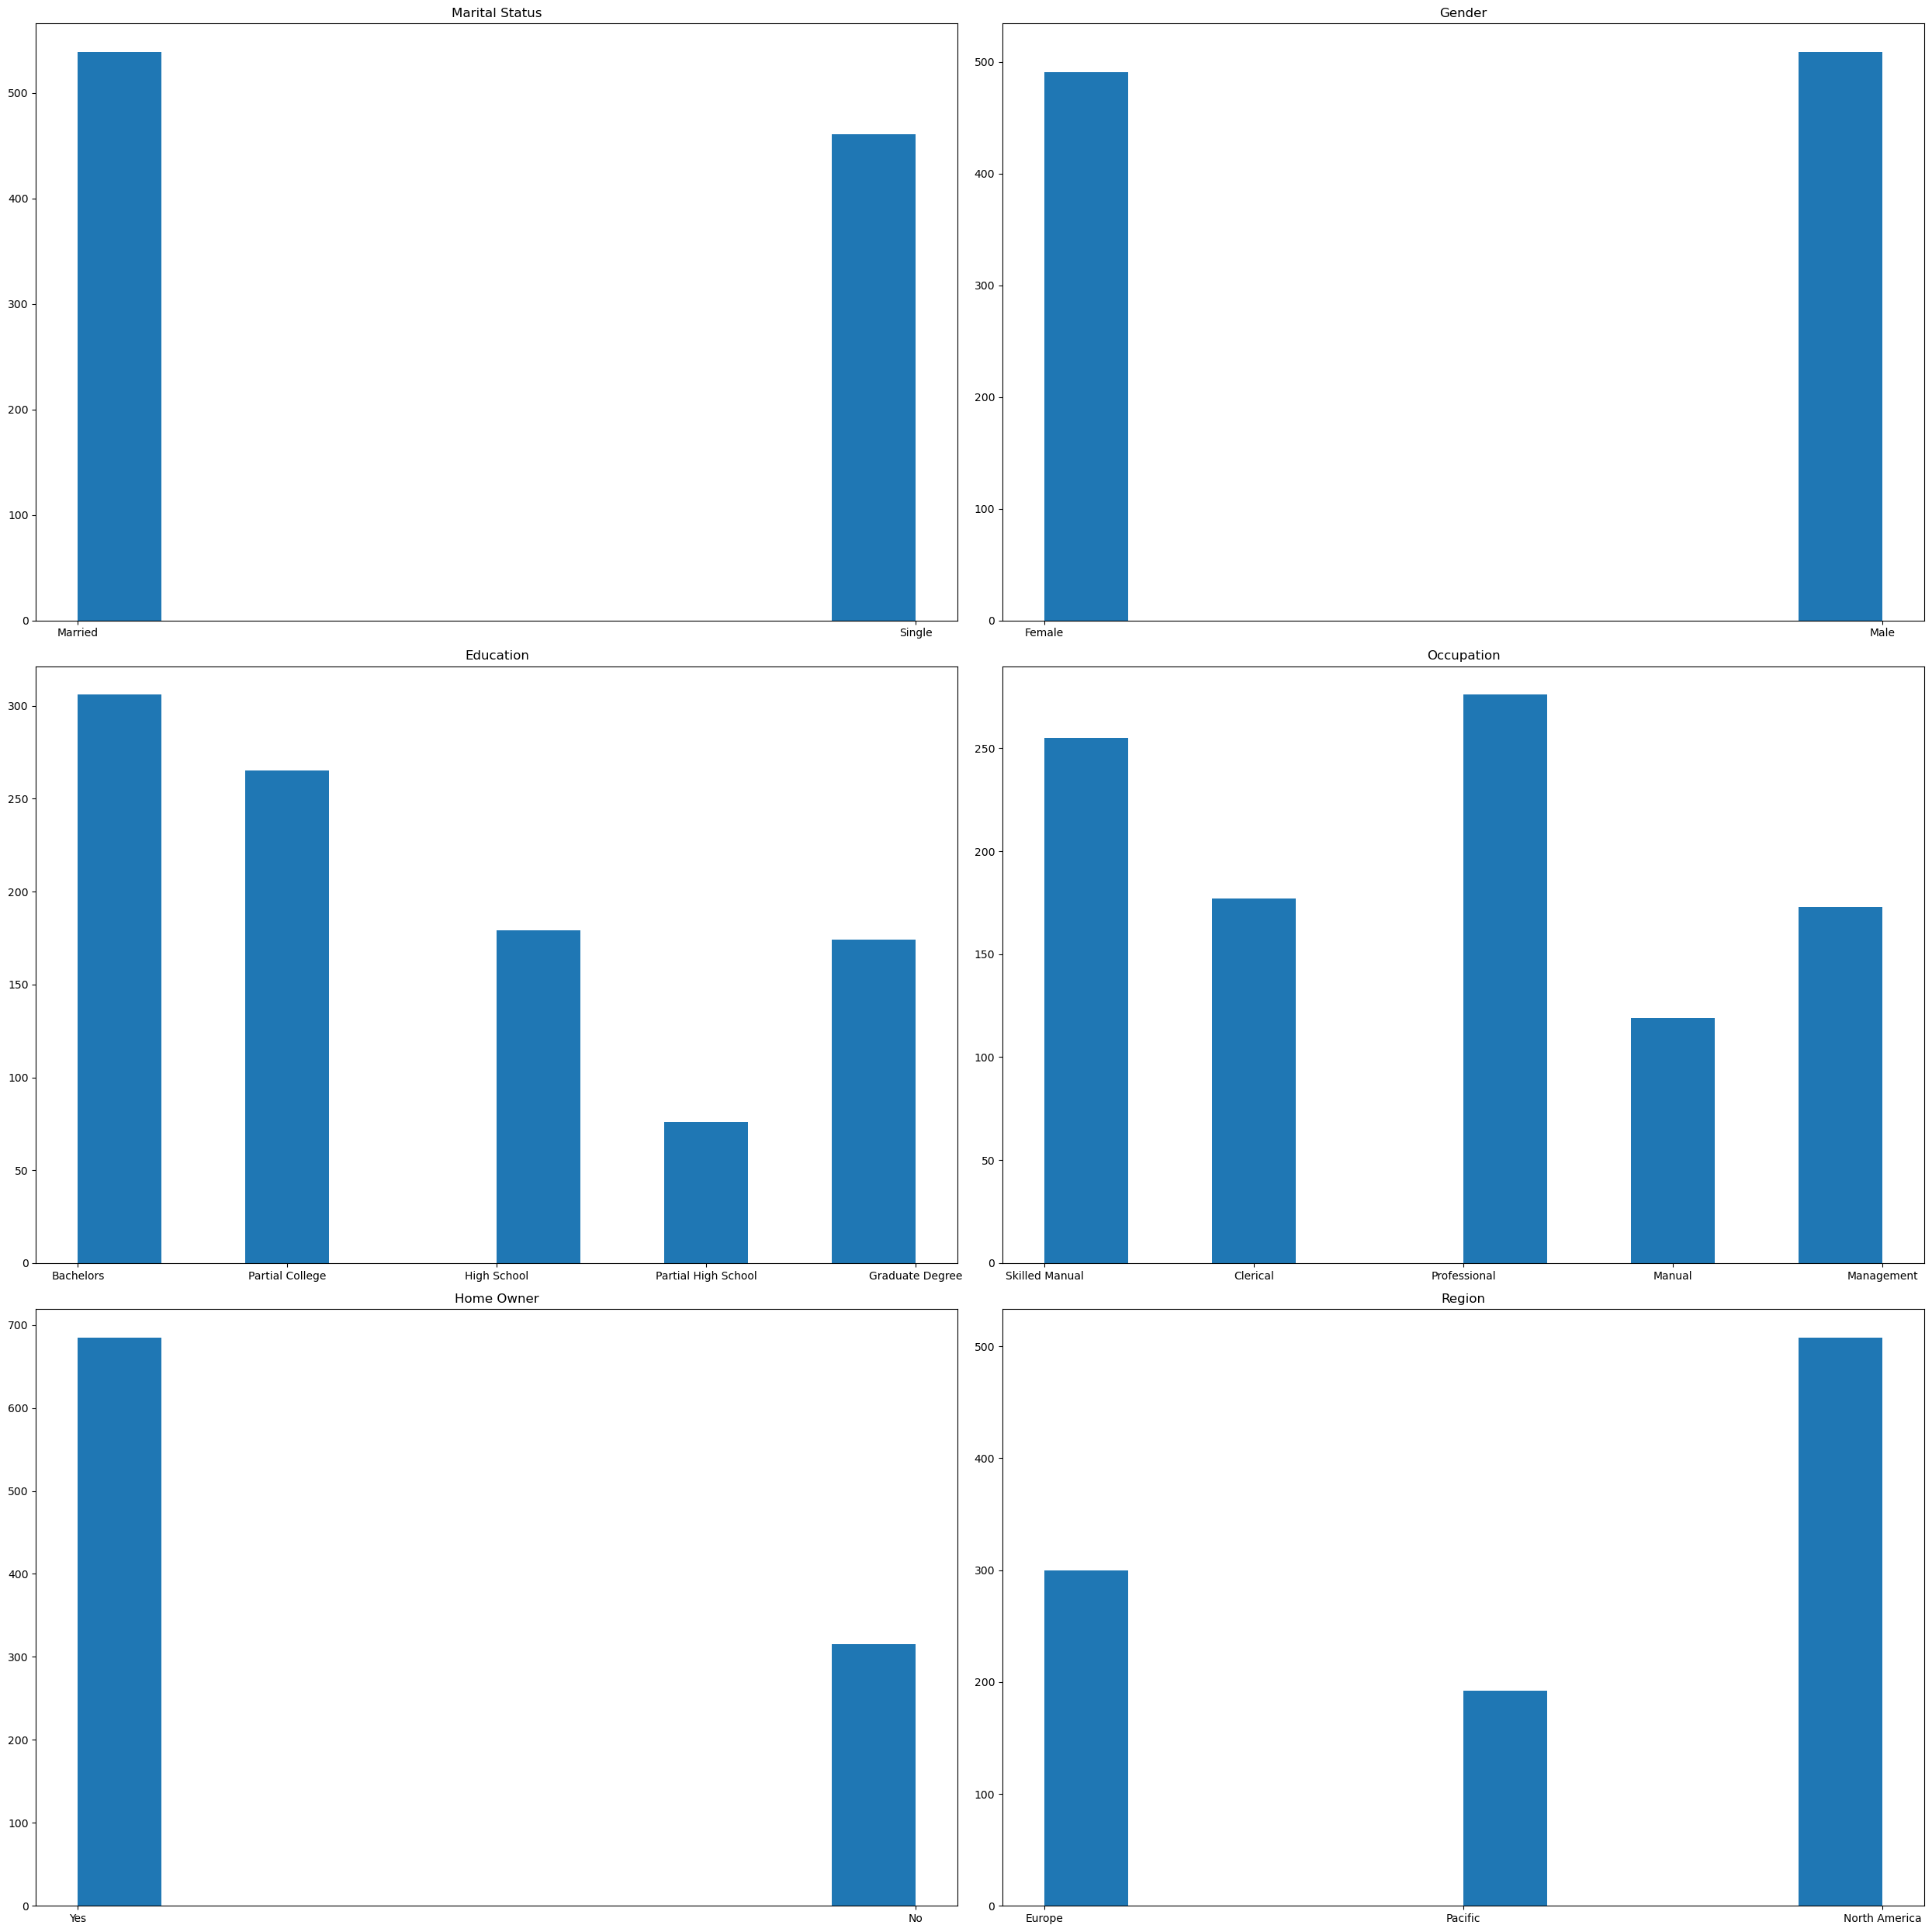

In [4]:
# Create a list of all categorical variables
categorical_variables = ['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Region']

# Create a figure and subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25,25))

# Generate a histogram for each categorical variable
for variable, ax in zip(categorical_variables, axes.ravel()):
  ax.hist(df[variable])
  ax.set_title(variable)
  fig.tight_layout()
# Show the plot
plt.show()

In [5]:
# Divide the dataset into two groups based on whether they purchased a bike or not
buy_yes = df['Purchased Bike'] == 'Yes'
df_buy_yes = df[buy_yes]

buy_no = df['Purchased Bike'] == 'No'
df_buy_no = df[buy_no]


### DIstribution of all categorical variables for those that purchased a bike

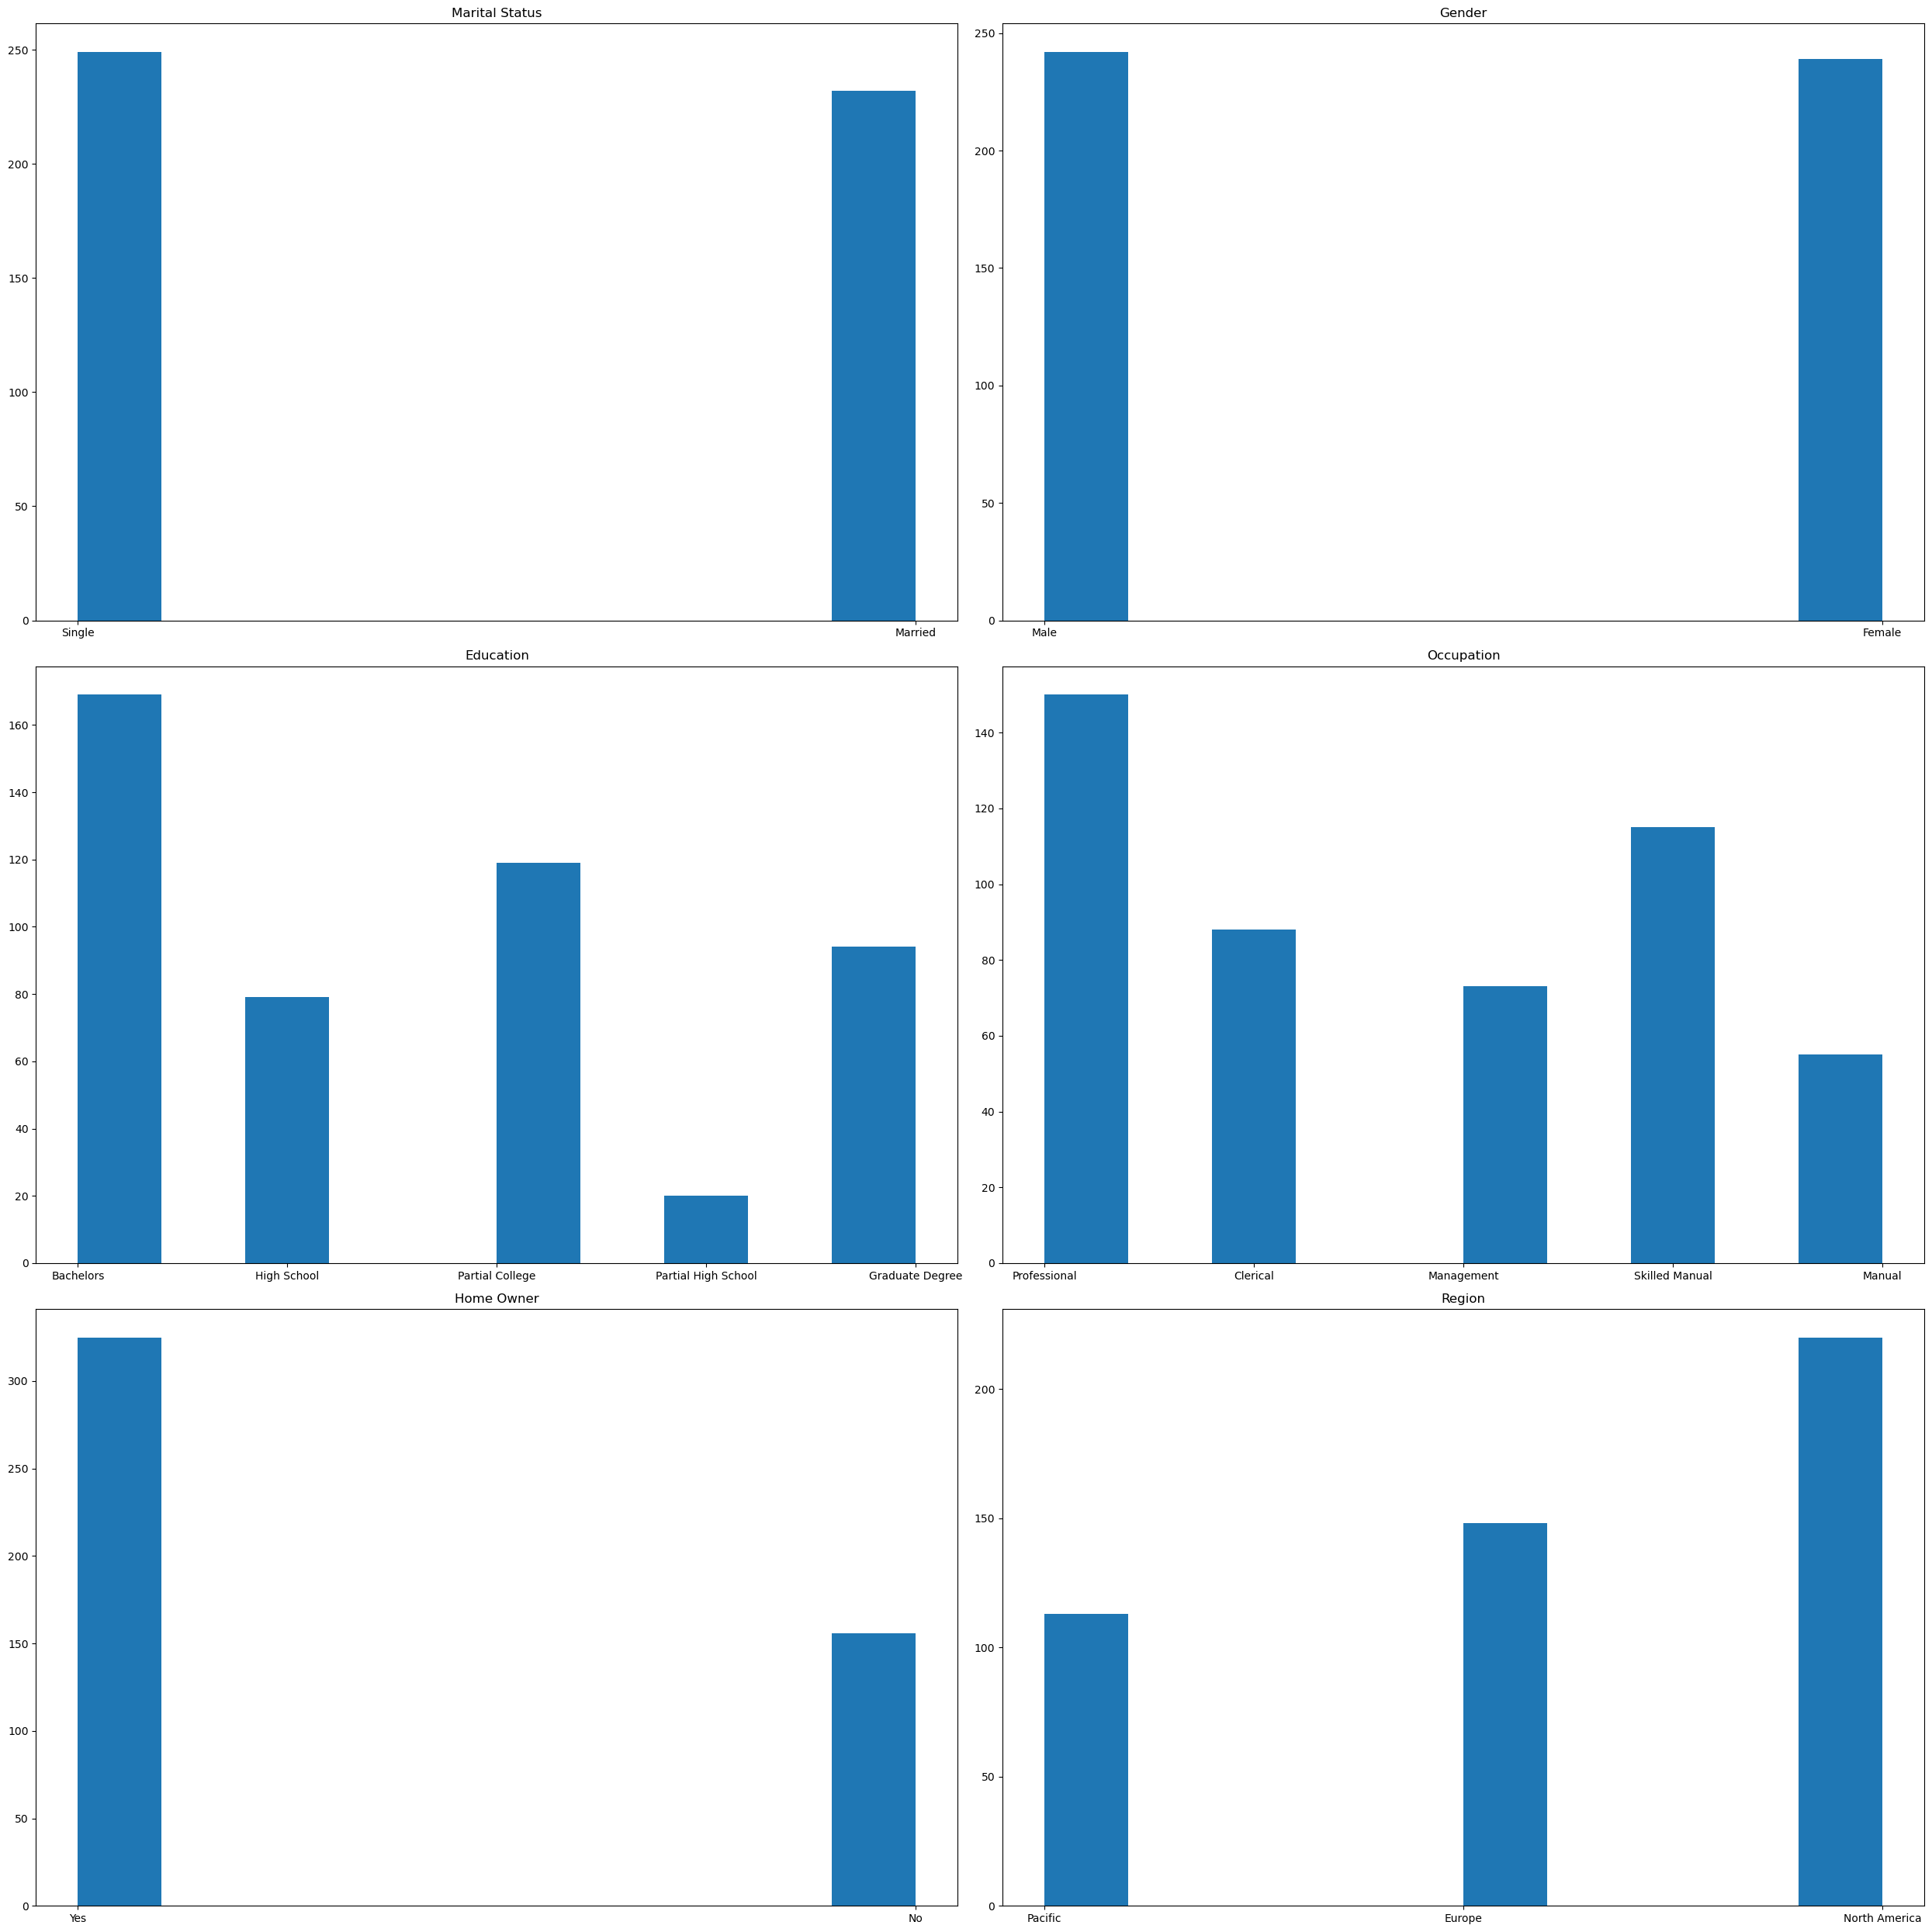

In [6]:
# Create a list of all categorical variables
categorical_variables = ['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Region']

# Create a figure and subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25,25))

# Generate a histogram for each categorical variable
for variable, ax in zip(categorical_variables, axes.ravel()):
  ax.hist(df_buy_yes[variable])
  ax.set_title(variable)
  fig.tight_layout()
# Show the plot
plt.show()

### DIstribution of all categorical variables for those that did not purchase a bike

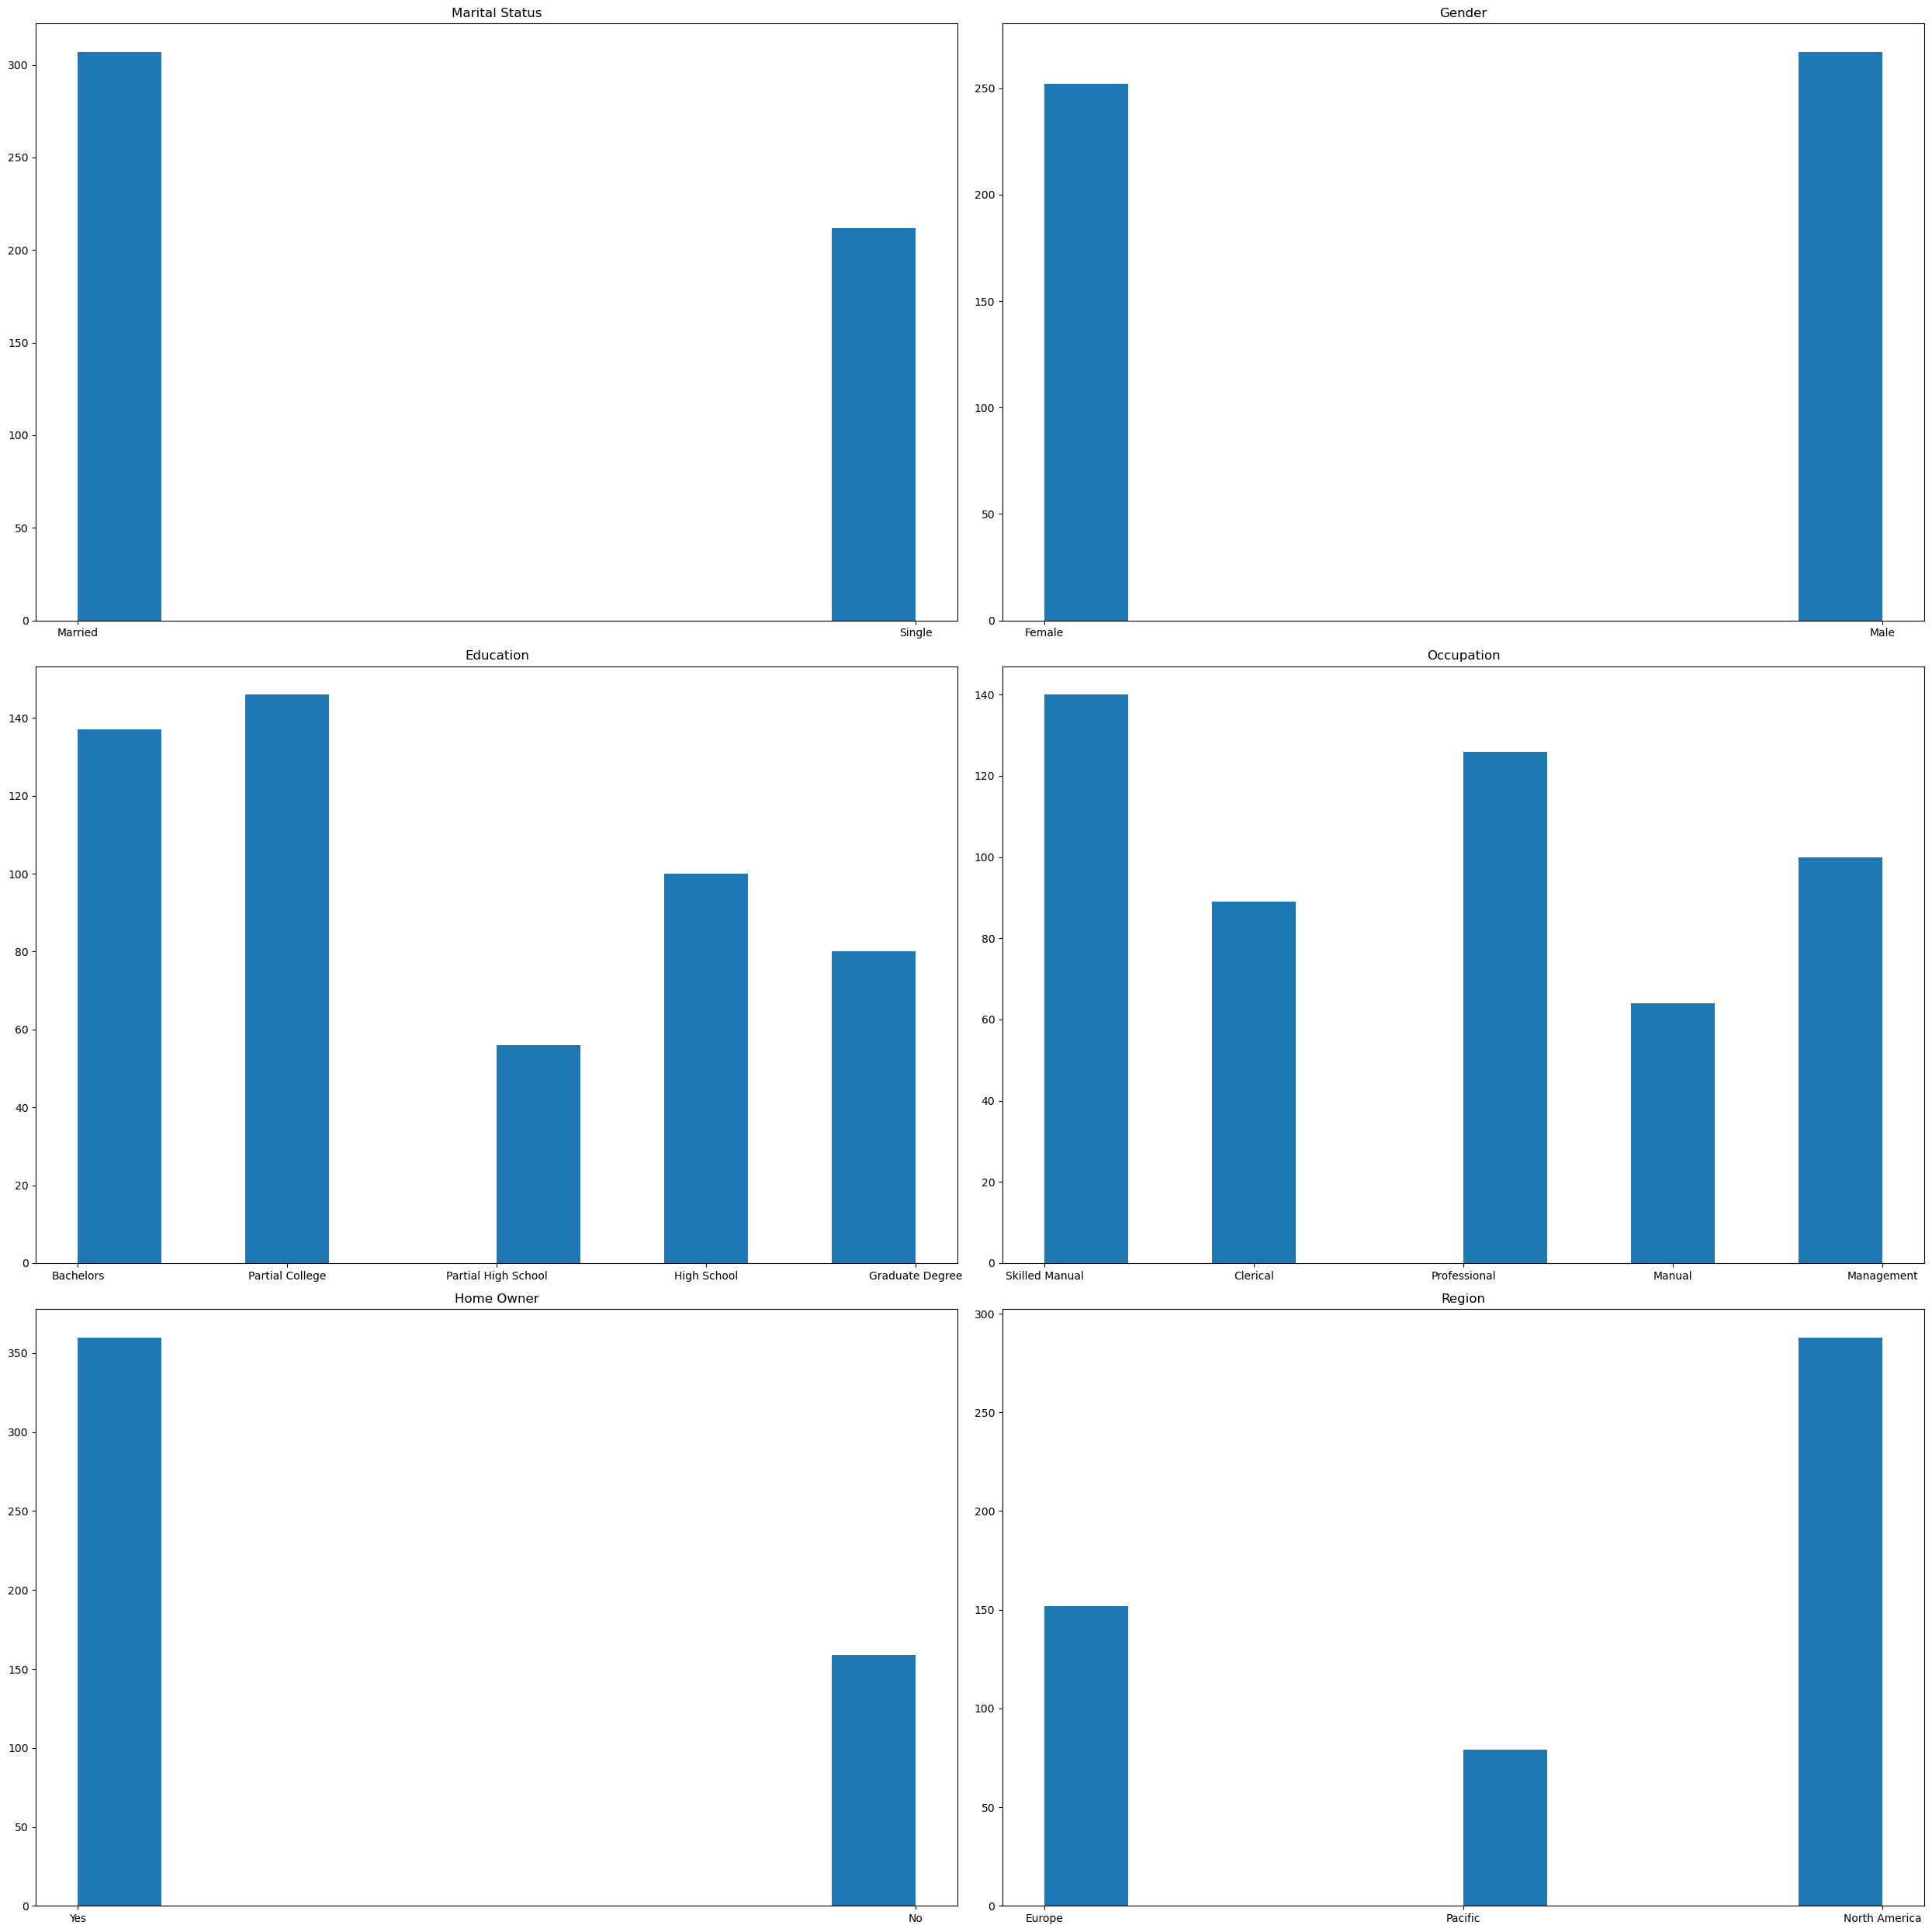

In [7]:
# Create a list of all categorical variables
categorical_variables = ['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Region']

# Create a figure and subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25,25))

# Generate a histogram for each categorical variable
for variable, ax in zip(categorical_variables, axes.ravel()):
  ax.hist(df_buy_no[variable])
  ax.set_title(variable)
  fig.tight_layout()
# Show the plot
plt.show()

### Comparing all factors to show demographics of who are likely to purchase a bike

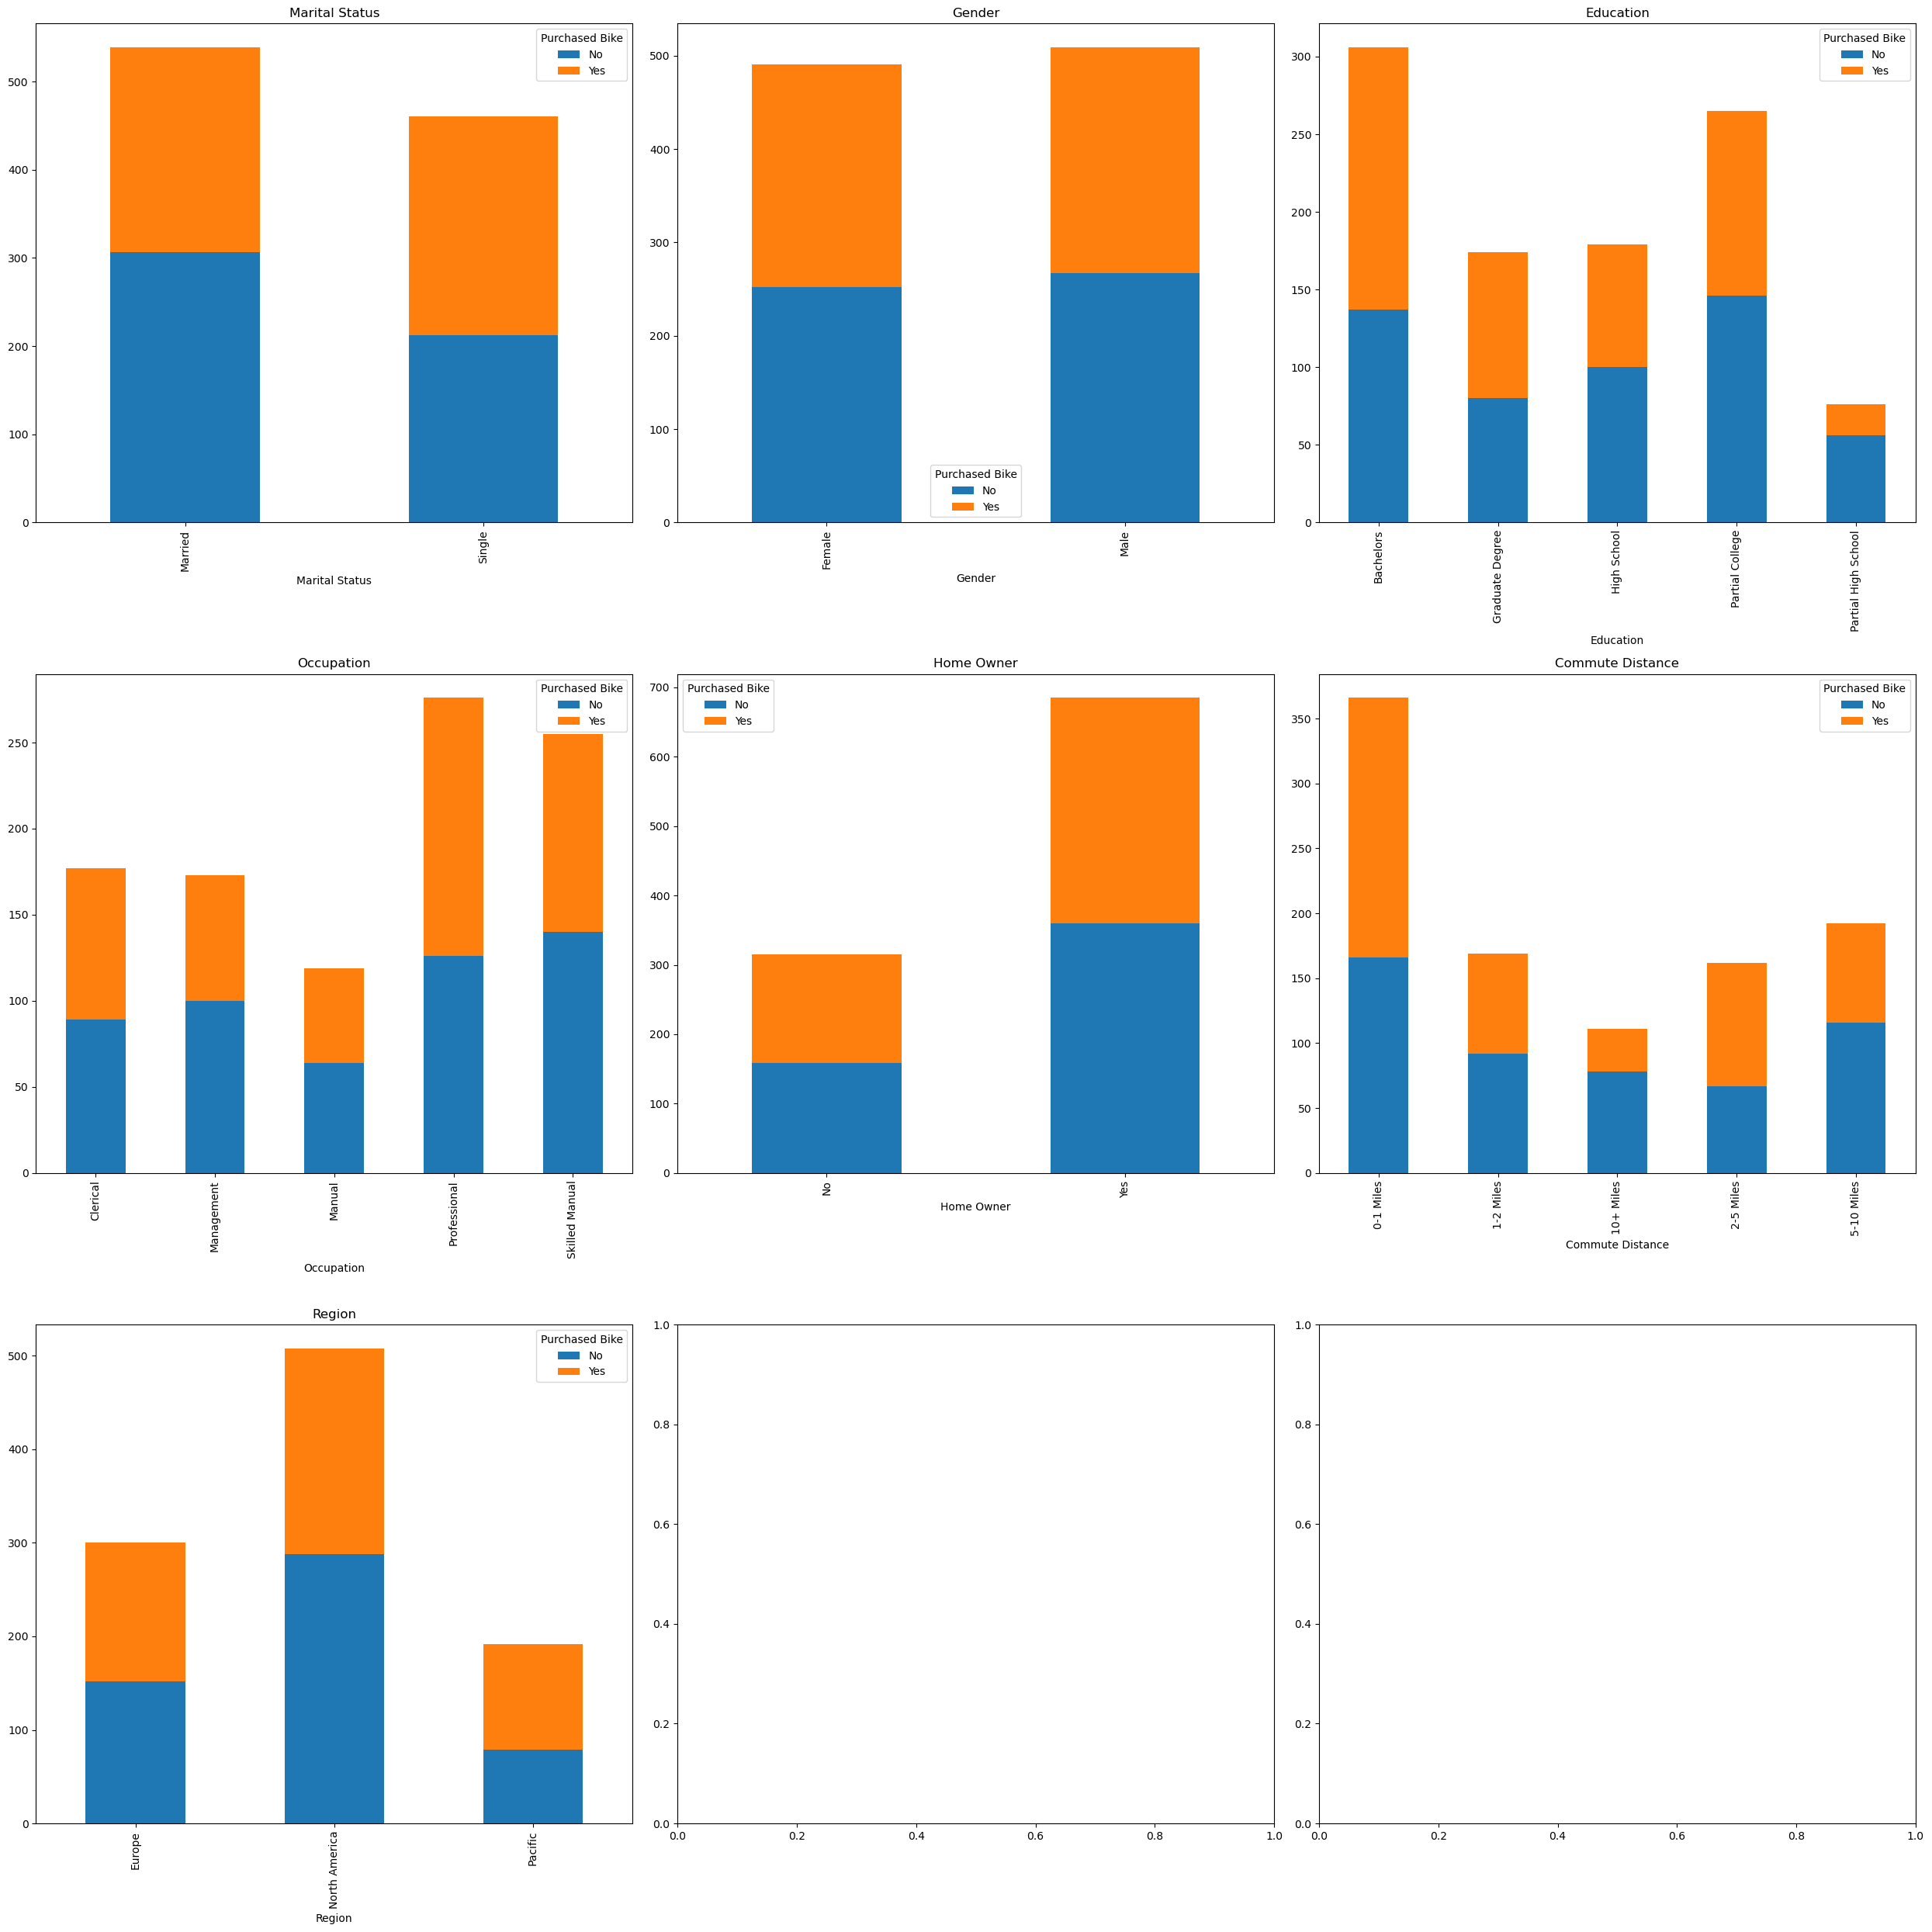

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 25))

for i, (col, ax) in enumerate(zip(df.select_dtypes(include="object").drop("Purchased Bike", axis=1).columns, axes.ravel())):
    df.groupby([col, "Purchased Bike"]).size().unstack().plot.bar(ax=ax, stacked=True)
    ax.set_title(col)

plt.tight_layout()
plt.show()

### Age distribution for those who purchased a bike and for those who did not

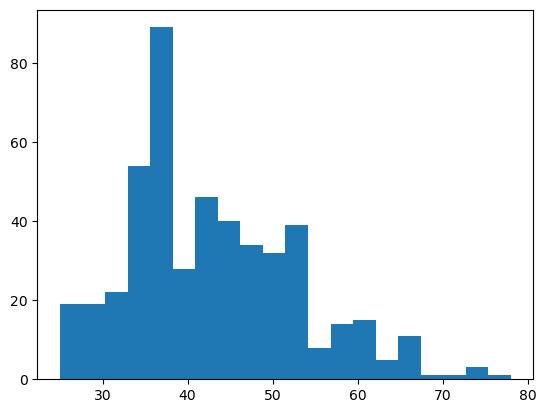

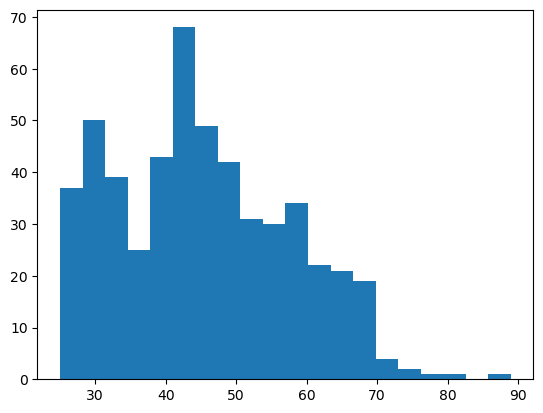

In [23]:
plt.hist(df_buy_yes['Age'], bins=20)
plt.show()

plt.hist(df_buy_no['Age'], bins=20)
plt.show()

<AxesSubplot:xlabel='Marital Status', ylabel='count'>

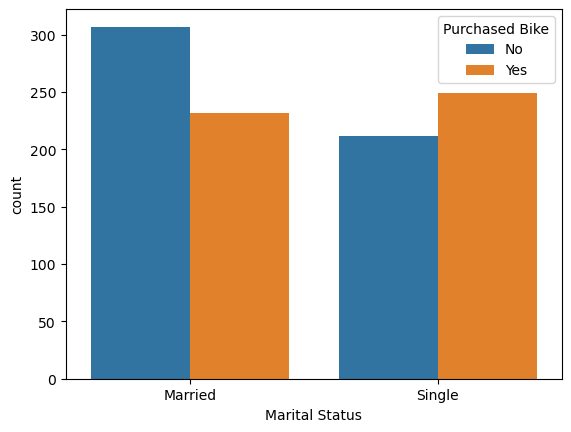

In [10]:
# Explore the relationship between Marital Status and Purchased Bike
sns.countplot(x='Marital Status', hue='Purchased Bike', data=df)

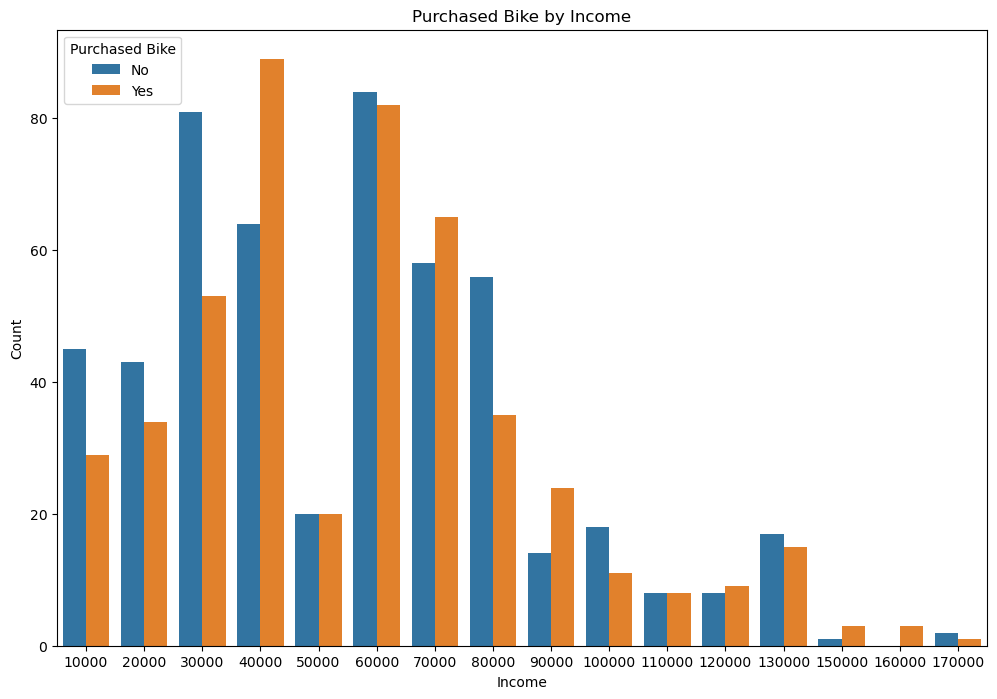

In [11]:
# Explore the relationship between Income and Purchased Bike
plt.figure(figsize=(12, 8))
sns.countplot(x='Income', hue='Purchased Bike', data=df)
plt.title('Purchased Bike by Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

<AxesSubplot:xlabel='Commute Distance', ylabel='count'>

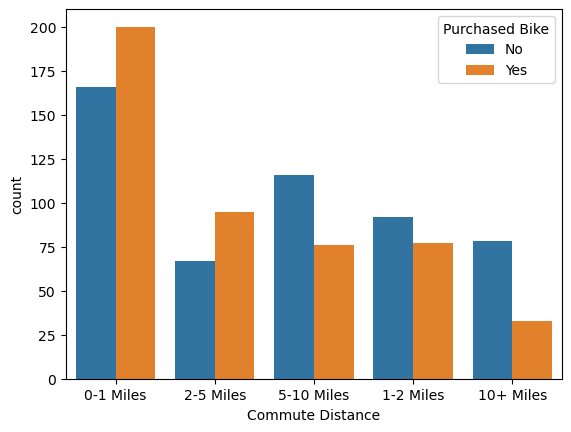

In [12]:
# Explore the relationship between Marital Status and Purchased Bike
sns.countplot(x='Commute Distance', hue='Purchased Bike', data=df)

Text(0.5, 1.0, 'Purchased Bike by Gender')

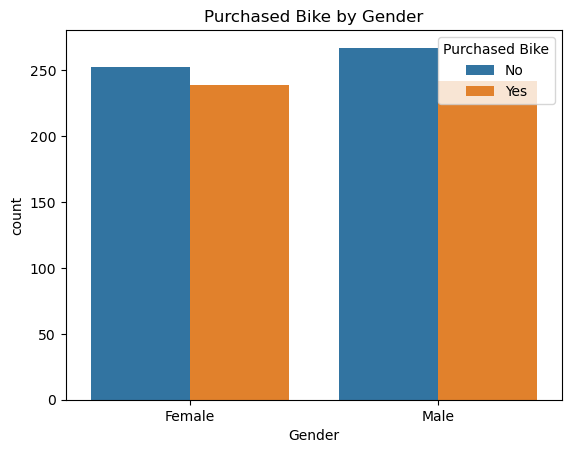

In [13]:
# Explore the relationship between Gender and Purchased Bike
sns.countplot(x='Gender', hue='Purchased Bike', data=df)
plt.title('Purchased Bike by Gender')

Text(0.5, 1.0, 'Purchased Bike by Income')

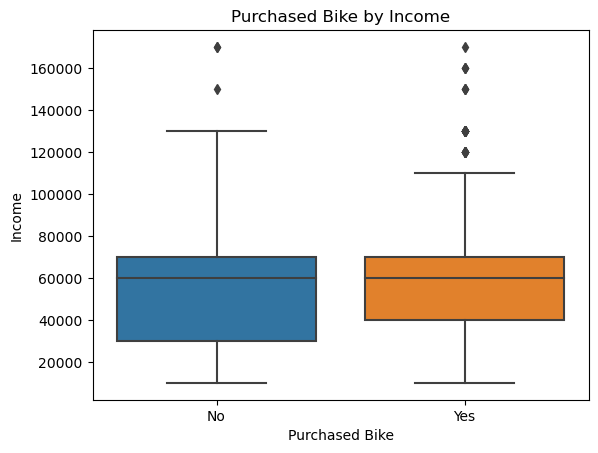

In [14]:
# Explore the relationship between Income and Purchased Bike
sns.boxplot(x='Purchased Bike', y='Income', data=df)
plt.title('Purchased Bike by Income')

<AxesSubplot:xlabel='Purchased Bike', ylabel='Age'>

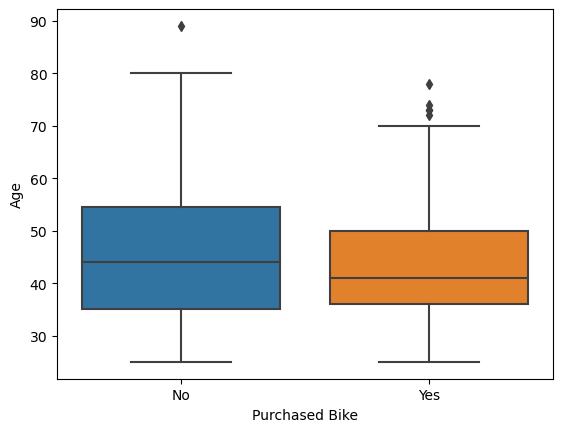

In [15]:
# Explore the relationship between Age and Purchased Bike
sns.boxplot(x='Purchased Bike', y='Age', data=df)

### Heatmap comparing the whole dataset and those who bought a bike

Text(0.5, 1.0, 'Heatmap for Dataset')

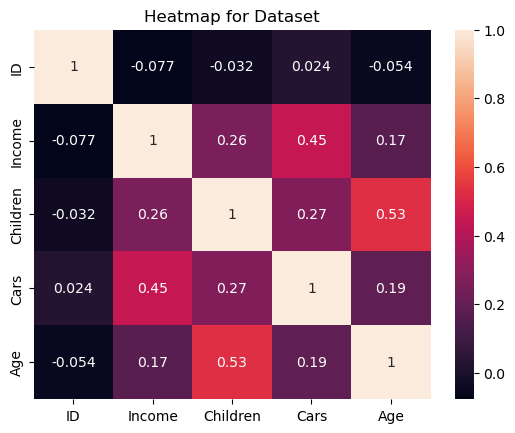

In [76]:
# Compute the correlation matrix
corr = df.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True)
plt.title('Heatmap for Dataset')

In [61]:
corr_yes = df_buy_yes.corr()

Text(0.5, 1.0, 'Heatmap for Purchased Bike')

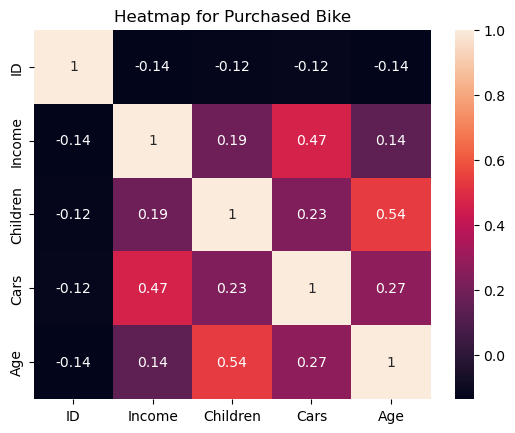

In [75]:
# Create a heatmap of the correlation matrix
sns.heatmap(corr_yes, annot=True)
plt.title('Heatmap for Purchased Bike')

### Pairplot for comparison

C:\Users\talk2\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


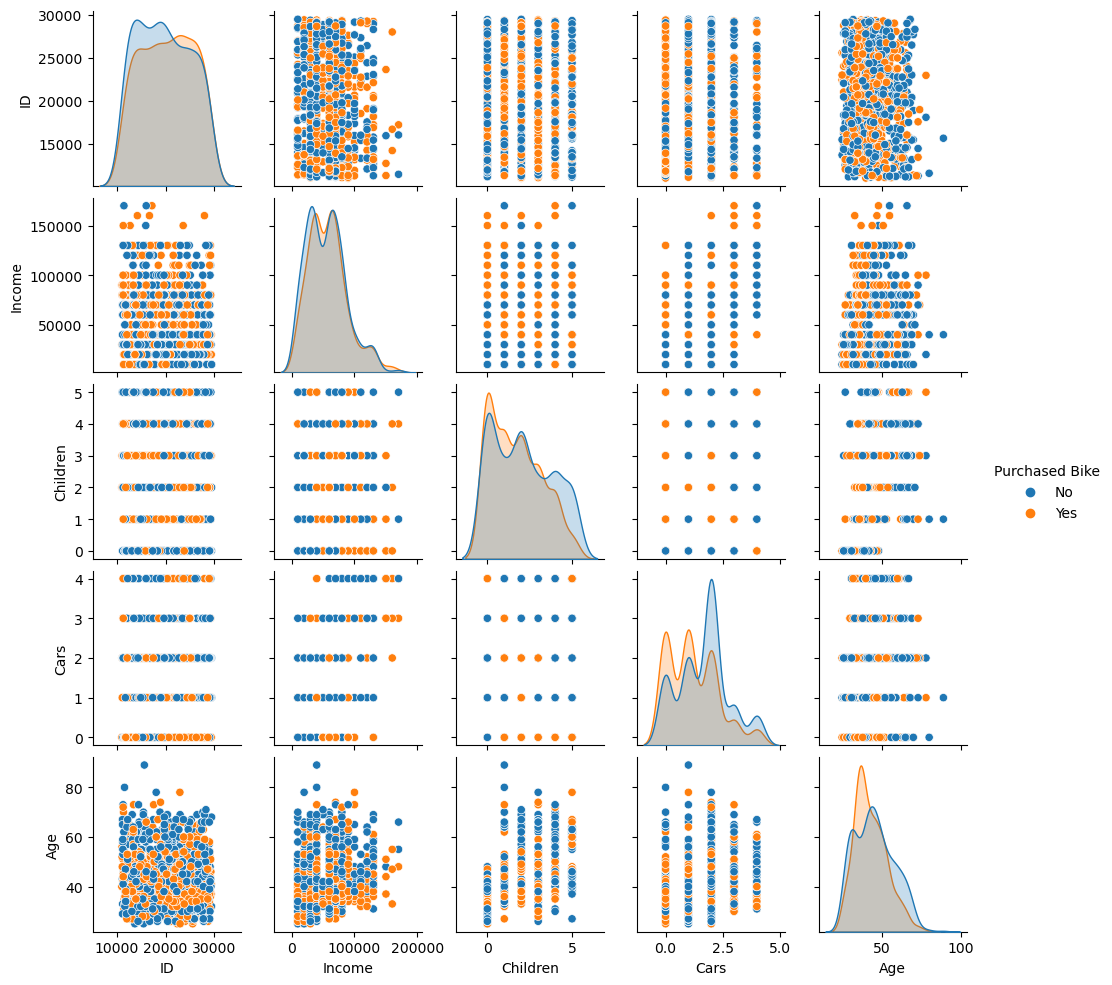

In [108]:
sns.pairplot(df,hue="Purchased Bike",size=2)

### Testing for Accuracy

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression


# Define the feature columns and target column
feature_cols = ['Marital Status', 'Gender', 'Income', 'Children', 'Education', 'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age']

target_col = ['Purchased Bike']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[feature_cols], df[target_col], random_state=0)

# Create a column transformer to preprocess the data
preprocessor = make_column_transformer(
    (OneHotEncoder(), ['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Commute Distance', 'Region']),
    (StandardScaler(), ['Income', 'Children', 'Cars', 'Age']),
    remainder='passthrough'
)

# Create a pipeline that combines the preprocessor with a logistic regression model
model = make_pipeline(preprocessor, LogisticRegression())

# Fit the model to the training data
model.fit(X_train,y_train.values.ravel())



# Evaluate the model on the test data
accuracy = model.score(X_test,y_test)
X = pd.DataFrame(df,columns = feature_cols)
# y = pd.Series(df['Purchased Bike'],name=df['Purchased Bike'])
print(f'Test accuracy: {accuracy:.3f}')

Test accuracy: 0.620
